<a href="https://colab.research.google.com/github/alptuggurler/CPE312/blob/main/week6v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df_test = pd.read_csv("/content/drive/MyDrive/1csv/week6/test.csv")
df_test.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [3]:
df = pd.read_csv("/content/drive/MyDrive/1csv/week6/train.csv")
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


In [6]:
df = df.dropna()

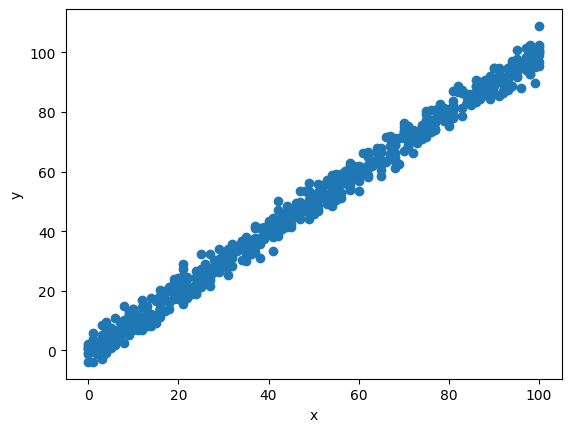

In [7]:
plt.scatter(df.x,df.y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [10]:
# model
lr = LinearRegression()

x = df.x.values.reshape(-1,1)
y = df.y.values.reshape(-1,1)
lr.fit(x,y)

# predicttion
lr.predict([[0]])

array([[-0.10726546]])

In [11]:
# intercept
b0_ = lr.intercept_
print(f"b0_: {b0_}")

#slope
b1 = lr.coef_
print(f"b1: {b1}") 

b0_: [-0.10726546]
b1: [[1.00065638]]


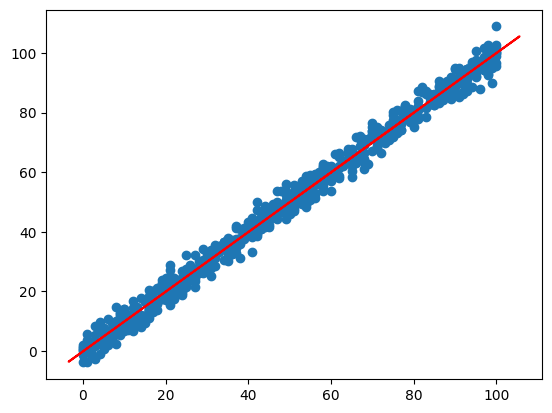

In [12]:
y_test = df_test.y.values.reshape(-1,1)

plt.scatter(x,y)

y_head = lr.predict(y_test)

plt.plot(y_test, y_head, color="red")
plt.show()

#polynomial


In [13]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [15]:
df = pd.read_csv("/content/drive/MyDrive/1csv/week6/Data (2).csv")

In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [17]:
df.describe()


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


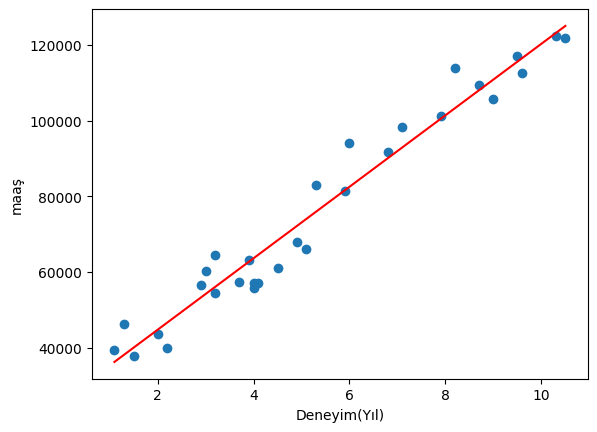

In [20]:
# Linear Regression
x = df.YearsExperience.values.reshape(-1,1)
y = df.Salary.values.reshape(-1,1)

lr = LinearRegression()
lr.fit(x,y)

# predict
y_head = lr.predict(x)

# visualization
plt.scatter(df.YearsExperience,df.Salary)
plt.xlabel("Deneyim(Yıl)")
plt.ylabel("maaş")
plt.plot(x,y_head,color="red")
plt.show()

In [21]:
print(f"r2_score: {r2_score(y,y_head)}")

r2_score: 0.9569566641435086


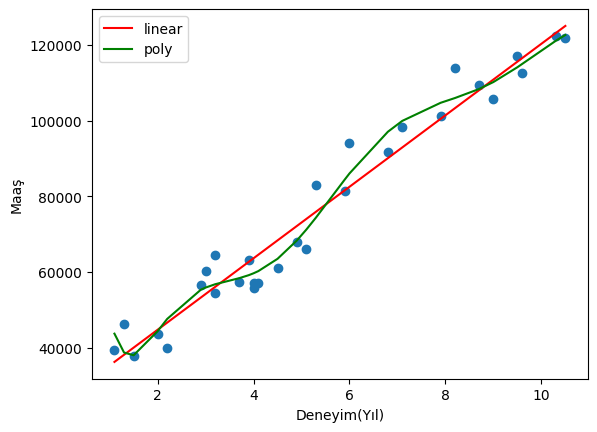

In [23]:
# Polinomial Linear Regression
poly_reg = PolynomialFeatures(degree=8)
x_poly = poly_reg.fit_transform(x)

lr2 = LinearRegression()
lr2.fit(x_poly,y)

# predict
y_head2 = lr2.predict(x_poly)

# visualization
plt.scatter(df.YearsExperience,df.Salary)
plt.xlabel("Deneyim(Yıl)")
plt.ylabel("Maaş")
plt.plot(x,y_head,color="red",label="linear")
plt.plot(x,y_head2,color="green",label="poly")
plt.legend()

plt.show()

In [24]:
print(f"r2_score: {r2_score(y,y_head2)}")

r2_score: 0.9728154307145793


#multiple

In [25]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error

In [26]:
df = pd.read_csv("/content/drive/MyDrive/1csv/week6/CarPrice.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [28]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [29]:
y = df['price']
x = df.drop(labels = ['price',"CarName","car_ID"],axis=1)

In [30]:
le = LabelEncoder()
x_cat = x.select_dtypes(include='object')
x_cat.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [31]:
for i in x_cat.columns:
    print(f"The no.of unique values in {i} are: {x_cat.loc[:,i].nunique()}")

The no.of unique values in fueltype are: 2
The no.of unique values in aspiration are: 2
The no.of unique values in doornumber are: 2
The no.of unique values in carbody are: 5
The no.of unique values in drivewheel are: 3
The no.of unique values in enginelocation are: 2
The no.of unique values in enginetype are: 7
The no.of unique values in cylindernumber are: 7
The no.of unique values in fuelsystem are: 8


In [32]:
for i in x_cat.columns:
    
    x_cat[i] = le.fit_transform(x_cat[i])
x_cat.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,1,0,1,0,2,0,0,2,5
1,1,0,1,0,2,0,0,2,5
2,1,0,1,2,2,0,5,3,5
3,1,0,0,3,1,0,3,2,5
4,1,0,0,3,0,0,3,1,5


In [33]:
x_num = x.select_dtypes(include=np.number)
x_num.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22


In [34]:
x = pd.concat([x_cat,x_num],axis=1)
x.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,symboling,...,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,0,1,0,2,0,0,2,5,3,...,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,1,0,1,0,2,0,0,2,5,3,...,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,1,0,1,2,2,0,5,3,5,1,...,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,1,0,0,3,1,0,3,2,5,2,...,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,1,0,0,3,0,0,3,1,5,2,...,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22


In [35]:
ss = StandardScaler()
x = pd.DataFrame(ss.fit_transform(x),columns=x.columns)
x.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,symboling,...,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,0.328798,-0.469295,1.130388,-3.050975,1.213330,-0.121867,-2.865105,-0.147475,0.869568,1.743470,...,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059
1,0.328798,-0.469295,1.130388,-3.050975,1.213330,-0.121867,-2.865105,-0.147475,0.869568,1.743470,...,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059
2,0.328798,-0.469295,1.130388,-0.717207,1.213330,-0.121867,1.886890,1.112210,0.869568,0.133509,...,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627
3,0.328798,-0.469295,-0.884652,0.449677,-0.589081,-0.121867,-0.013908,-0.147475,0.869568,0.938490,...,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354
4,0.328798,-0.469295,-0.884652,0.449677,-2.391492,-0.121867,-0.013908,-1.407161,0.869568,0.938490,...,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900


In [36]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=42)
print("The shape of xtrain is: ",xtrain.shape)
print("The shape of xtest is: ",xtest.shape)
print("The shape of ytrain is: ",ytrain.shape)
print("The shape of ytest is: ",ytest.shape)

The shape of xtrain is:  (143, 23)
The shape of xtest is:  (62, 23)
The shape of ytrain is:  (143,)
The shape of ytest is:  (62,)


In [37]:
lr = LinearRegression()
lr_model = lr.fit(xtrain,ytrain)
ypred_train = lr_model.predict(xtrain)
ypred_test = lr_model.predict(xtest)

In [38]:
r2_score(ytrain,ypred_train),r2_score(ytest,ypred_test)

(0.9005689762361274, 0.8000166317722497)

In [39]:
np.sqrt(mean_squared_error(ytrain,ypred_train)),np.sqrt(mean_squared_error(ytest,ypred_test))

(2461.764170912046, 3722.327685770014)

In [40]:
pd.DataFrame(lr_model.coef_,index=xtrain.columns,columns=['Regression Coefficients'])

,Regression Coefficients
fueltype,2386.628635
aspiration,465.550515
doornumber,-862.167864
carbody,-965.349021
drivewheel,693.168881
enginelocation,1211.464690
enginetype,227.634668
cylindernumber,-345.326005
fuelsystem,-151.072757
symboling,380.911781


In [41]:
lr_model.intercept_


13162.057239986392